# Libraries and set everything

Some code removed for privacy (setting the API, Reddit credentials and so on...)

In [1]:
# Import libraries
import requests
import pandas as pd
import json
import praw
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
nltk.download
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
from afinn import Afinn
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from nrclex import NRCLex
import networkx as nx
from collections import Counter

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
os.chdir("C:/Users/andre/OneDrive/Documenti/unimib/magistrale/secondo anno/social media analytics/nuovo/progetto/")

In [3]:
auth = requests.auth.HTTPBasicAuth ( 'P55MNrZbyPcuexum-xcuyg', 'YSg4r3CnGg43sfSkpTIVqsIsqvAwPQ')

In [4]:
data = {'grant_type': 'password', 'username': 'andrelp99', 'password': 'jDUT_$2Te?xSewC'}

In [5]:
# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'MyAPI/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token', auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

In [6]:
#Check the authentication
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [7]:
reddit = praw.Reddit(client_id='',
                     client_secret='',
                     password='',
                     user_agent='',
                     username='',
                     check_for_async=False)

# Info about r/ACMilan

In [22]:
res_info = requests.get("https://oauth.reddit.com/r/ACMilan/about",
                   headers=headers)

#print(res.json()['data'])
print("name: " + res_info.json()['data']['url'])
print("subscribers: " + str(res_info.json()['data']['subscribers']))
print("active users: " + str(res_info.json()['data']['active_user_count']))
print("description: " + res_info.json()['data']['description'])
print("public description: " + res_info.json()['data']['public_description'])

name: /r/ACMilan/
subscribers: 61917
active users: 130
description: #####Welcome to /r/ACMilan! Please be sure to visit the [subreddit rules and submission guidelines](https://www.reddit.com/r/ACMilan/wiki/rules).[](https://en.wikipedia.org/wiki/2007_FIFA_Club_World_Cup)[](https://en.wikipedia.org/wiki/1969_Intercontinental_Cup)[](https://en.wikipedia.org/wiki/1989_Intercontinental_Cup)[](https://en.wikipedia.org/wiki/1990_Intercontinental_Cup)[](https://en.wikipedia.org/wiki/1962%E2%80%9363_European_Cup)[](https://en.wikipedia.org/wiki/1968%E2%80%9369_European_Cup)[](https://en.wikipedia.org/wiki/1988%E2%80%9389_European_Cup)[](https://en.wikipedia.org/wiki/1989%E2%80%9390_European_Cup)[](https://en.wikipedia.org/wiki/1993%E2%80%9394_UEFA_Champions_League)[](https://en.wikipedia.org/wiki/2002%E2%80%9303_UEFA_Champions_League)[](https://en.wikipedia.org/wiki/2006%E2%80%9307_UEFA_Champions_League)[](https://en.wikipedia.org/wiki/1989_European_Super_Cup)[](https://en.wikipedia.org/wiki/1

# Data acquisition

## Data posts

In [154]:
milan_res = requests.get("https://oauth.reddit.com/r/ACMilan/new",
                   headers=headers, params={'limit':100})

In [155]:
title=[]
selftext=[]
upvote_ratio=[]
ups=[]
downs=[]
score=[]
author=[]
date_and_time=[]
user_id=[]
kind_id=[]
num_comments=[]

In [156]:
df = pd.DataFrame()  # initialize dataframe
i = 0
# loop through each post retrieved from GET request
for post in milan_res.json()['data']['children']:
    title.insert(i, post['data']['title'])
    selftext.insert(i, post['data']['selftext'])
    upvote_ratio.insert(i, post['data']['upvote_ratio'])
    ups.insert(i, post['data']['ups'])
    downs.insert(i, post['data']['downs'])
    score.insert(i, post['data']['score'])
    author.insert(i, post['data']['author'])
    date_and_time.insert(i, datetime.fromtimestamp(post['data']['created']))
    user_id.insert(i, post['data']['id'])
    kind_id.insert(i, str(post['kind']+'_'+post['data']['id']))
    num_comments.insert(i, post['data']['num_comments'])
    i = i + 1

In [157]:
milan_res_2 = requests.get("https://oauth.reddit.com/r/ACMilan/new",
                   headers=headers, params={'limit':100, 'after': kind_id[-1]})

# loop through each post retrieved from GET request
for post in milan_res_2.json()['data']['children']:
    title.insert(i, post['data']['title'])
    selftext.insert(i, post['data']['selftext'])
    upvote_ratio.insert(i, post['data']['upvote_ratio'])
    ups.insert(i, post['data']['ups'])
    downs.insert(i, post['data']['downs'])
    score.insert(i, post['data']['score'])
    author.insert(i, post['data']['author'])
    date_and_time.insert(i, datetime.fromtimestamp(post['data']['created']))
    user_id.insert(i, post['data']['id'])
    kind_id.insert(i, str(post['kind']+'_'+post['data']['id']))
    num_comments.insert(i, post['data']['num_comments'])
    i = i + 1

In [158]:
milan_res_3 = requests.get("https://oauth.reddit.com/r/ACMilan/new",
                   headers=headers, params={'limit':100, 'after': kind_id[-1]})

# loop through each post retrieved from GET request
for post in milan_res_3.json()['data']['children']:
    title.insert(i, post['data']['title'])
    selftext.insert(i, post['data']['selftext'])
    upvote_ratio.insert(i, post['data']['upvote_ratio'])
    ups.insert(i, post['data']['ups'])
    downs.insert(i, post['data']['downs'])
    score.insert(i, post['data']['score'])
    author.insert(i, post['data']['author'])
    date_and_time.insert(i, datetime.fromtimestamp(post['data']['created']))
    user_id.insert(i, post['data']['id'])
    kind_id.insert(i, str(post['kind']+'_'+post['data']['id']))
    num_comments.insert(i, post['data']['num_comments'])
    i = i + 1

In [159]:
milan_res_4 = requests.get("https://oauth.reddit.com/r/ACMilan/new",
                   headers=headers, params={'limit':100, 'after': kind_id[-1]})

# loop through each post retrieved from GET request
for post in milan_res_4.json()['data']['children']:
    title.insert(i, post['data']['title'])
    selftext.insert(i, post['data']['selftext'])
    upvote_ratio.insert(i, post['data']['upvote_ratio'])
    ups.insert(i, post['data']['ups'])
    downs.insert(i, post['data']['downs'])
    score.insert(i, post['data']['score'])
    author.insert(i, post['data']['author'])
    date_and_time.insert(i, datetime.fromtimestamp(post['data']['created']))
    user_id.insert(i, post['data']['id'])
    kind_id.insert(i, str(post['kind']+'_'+post['data']['id']))
    num_comments.insert(i, post['data']['num_comments'])
    i = i + 1

In [160]:
dict = {'title': title, 'selftext': selftext, 'upvote_ratio': upvote_ratio,
        'ups': ups, 'downs': downs, 'score': score,
        'author': author, 'date_and_time': date_and_time, 'user_id': user_id,
        'kind_id': kind_id, 'num_comments': num_comments} 
    
df = pd.DataFrame(dict)

In [161]:
df

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments
0,Milan Primavera just drew 0-0 vs Roma Primaver...,,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18
1,[Pre-Match Thread] Milan vs Bologna (Serie A 2...,&amp;#x200B;\n\n| Information|Result|\n|:-|:-|...,1.00,29,0,29,HeirOfRhoads,2024-01-27 07:46:06,1ac4q8v,t3_1ac4q8v,21
2,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7
3,[DiMarzio] For Origi to Los Angeles FC: total ...,,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19
4,[DiMarzio] Pellegrino could join Verona after ...,,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15
...,...,...,...,...,...,...,...,...,...,...,...
395,[Antonio Gioia] Milan formed a circle at the e...,,0.97,142,0,142,HommoFroggy,2023-12-31 08:34:28,18v2j1h,t3_18v2j1h,63
396,"In his 150th game for AC Milan, Ismael Bennace...",,0.98,289,0,289,Claija79,2023-12-31 04:12:55,18uxv0r,t3_18uxv0r,22
397,United we stand. Forza Milan ❤️🖤,,0.99,170,0,170,Claija79,2023-12-30 22:51:08,18uqrwb,t3_18uqrwb,5
398,"[IFTV]] Pulisic has scored 6 Serie A goals, br...",,0.99,241,0,241,mercurialsaliva,2023-12-30 22:40:25,18uqj2y,t3_18uqj2y,34


In [183]:
df['Date'] = pd.to_datetime(df["date_and_time"]).dt.date
df['Time'] = pd.to_datetime(df["date_and_time"]).dt.time

In [189]:
# only include posts when the transfer window is open (between 02-01-2024 and now)
df = df.loc[(df['date_and_time'] > '2024-01-01')]
df

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time
0,Milan Primavera just drew 0-0 vs Roma Primaver...,,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45
1,[Pre-Match Thread] Milan vs Bologna (Serie A 2...,&amp;#x200B;\n\n| Information|Result|\n|:-|:-|...,1.00,29,0,29,HeirOfRhoads,2024-01-27 07:46:06,1ac4q8v,t3_1ac4q8v,21,2024-01-27,07:46:06
2,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28
3,[DiMarzio] For Origi to Los Angeles FC: total ...,,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38
4,[DiMarzio] Pellegrino could join Verona after ...,,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,"Seven years ago today, Olivier Giroud scored a...",,0.91,39,0,39,Swimmer4052,2024-01-01 15:40:32,18vy0y6,t3_18vy0y6,3,2024-01-01,15:40:32
388,Rafael Leao to Skysport: ''Football has always...,***Football and music: how important are they ...,0.99,133,0,133,HeirOfRhoads,2024-01-01 13:57:44,18vw8s6,t3_18vw8s6,27,2024-01-01,13:57:44
389,Monday Discussion Thread,Great place for team discussion/whatever Serie...,0.85,9,0,9,AutoModerator,2024-01-01 05:00:29,18voilc,t3_18voilc,31,2024-01-01,05:00:29
390,[Longo] Milan also evaluates Arsenal's Tomiyas...,,0.97,64,0,64,Claija79,2024-01-01 02:49:47,18vmf8d,t3_18vmf8d,19,2024-01-01,02:49:47


In [212]:
# for the purpose of our work, focused on market aspects and not game-related aspects, the posts about the 
# matches will be eliminated: they are among the most commented and among the most upvoted.

filter = df['title'].str.contains('Match Thread')
df = df[~filter]

In [213]:
df

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time,text_proc
0,Milan Primavera just drew 0-0 vs Roma Primaver...,,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45,"[milan, primavera, drew, 00, v, rom, primavera..."
2,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28,"[rivalry, watch, serie, matchday, 22, 202324]"
3,[DiMarzio] For Origi to Los Angeles FC: total ...,,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38,"[dimarzio, origi, los, angeles, fc, total, agr..."
4,[DiMarzio] Pellegrino could join Verona after ...,,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22,"[dimarzio, pellegrino, could, join, verona, co..."
5,[Bianchin] Milan is trying to buy Buba Sangaré...,,0.95,41,0,41,Claija79,2024-01-26 21:39:21,1absava,t3_1absava,13,2024-01-26,21:39:21,"[bianchin, milan, trying, buy, buba, sangaré, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,"Seven years ago today, Olivier Giroud scored a...",,0.91,39,0,39,Swimmer4052,2024-01-01 15:40:32,18vy0y6,t3_18vy0y6,3,2024-01-01,15:40:32,"[seven, year, ago, today, olivier, giroud, sco..."
388,Rafael Leao to Skysport: ''Football has always...,***Football and music: how important are they ...,0.99,133,0,133,HeirOfRhoads,2024-01-01 13:57:44,18vw8s6,t3_18vw8s6,27,2024-01-01,13:57:44,"[rafael, leao, skysport, football, ha, always,..."
389,Monday Discussion Thread,Great place for team discussion/whatever Serie...,0.85,9,0,9,AutoModerator,2024-01-01 05:00:29,18voilc,t3_18voilc,31,2024-01-01,05:00:29,"[monday, discussion, thread]"
390,[Longo] Milan also evaluates Arsenal's Tomiyas...,,0.97,64,0,64,Claija79,2024-01-01 02:49:47,18vmf8d,t3_18vmf8d,19,2024-01-01,02:49:47,"[longo, milan, also, evaluates, arsenals, tomi..."


In [214]:
df.to_csv('Reddit_post.csv')

In [1111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          377 non-null    object 
 1   selftext       62 non-null     object 
 2   upvote_ratio   377 non-null    float64
 3   ups            377 non-null    int64  
 4   downs          377 non-null    int64  
 5   score          377 non-null    int64  
 6   author         377 non-null    object 
 7   date_and_time  377 non-null    object 
 8   user_id        377 non-null    object 
 9   kind_id        377 non-null    object 
 10  num_comments   377 non-null    int64  
 11  Date           377 non-null    object 
 12  Time           377 non-null    object 
 13  text_proc      377 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 41.4+ KB


## Data comments on posts

In [105]:
comments=[]

In [112]:
# more than one execution, to not reach Reddit API requests cap

for abc in df['kind_id']:
    post = abc[3:]
    post_link ="https://oauth.reddit.com/r/ACMilan/comments/" + str(post)
    print(post_link)
    coms_res = requests.get(post_link, headers=headers)

    for post in coms_res.json():
        comments.append(post['data']['children'])

https://oauth.reddit.com/r/ACMilan/comments/1ac9dck
https://oauth.reddit.com/r/ACMilan/comments/1ac4esd
https://oauth.reddit.com/r/ACMilan/comments/1abw72s
https://oauth.reddit.com/r/ACMilan/comments/1abv03z
https://oauth.reddit.com/r/ACMilan/comments/1absava
https://oauth.reddit.com/r/ACMilan/comments/1abp825
https://oauth.reddit.com/r/ACMilan/comments/1abnruv
https://oauth.reddit.com/r/ACMilan/comments/1abnlns
https://oauth.reddit.com/r/ACMilan/comments/1abm5qw
https://oauth.reddit.com/r/ACMilan/comments/1ablxbx
https://oauth.reddit.com/r/ACMilan/comments/1abfk94
https://oauth.reddit.com/r/ACMilan/comments/1abcy02
https://oauth.reddit.com/r/ACMilan/comments/1abb9uq
https://oauth.reddit.com/r/ACMilan/comments/1ab5m0m
https://oauth.reddit.com/r/ACMilan/comments/1ab55pt
https://oauth.reddit.com/r/ACMilan/comments/19fl7bo
https://oauth.reddit.com/r/ACMilan/comments/19fjssi
https://oauth.reddit.com/r/ACMilan/comments/19fip7a
https://oauth.reddit.com/r/ACMilan/comments/19fgsg6
https://oaut

In [113]:
name=[]  # identifies the comment
ups=[] # n ups
downs=[]  # n downs
author=[] # author name
author_fullname=[] # author code
parent_id=[] # where it comes from
link_id=[]  # where it comes from
id=[]
body=[] # what the comment says
# replies?

df_comm = pd.DataFrame()

In [114]:
comments_2 = comments[1::2]  # not posts, only comments

In [115]:
# loop through each post retrieved from GET request
for post in comments_2:
    for comm in post:
        if comm['kind'] == 't1':
            name.append(comm['data']['name'])
            ups.append(comm['data']['ups'])
            downs.append(comm['data']['downs'])
            author.append(comm['data']['author'])
            parent_id.append(comm['data']['parent_id'])
            link_id.append(comm['data']['link_id'])
            id.append(comm['data']['id'])
            body.append(comm['data']['body'])
            if comm['data']['body'] == '[cancellato]':             
                author_fullname.append('[deleted]')
            elif comm['data']['body'] != '[cancellato]':
                if 'author_fullname' in comm['data'].keys():
                    author_fullname.append(comm['data']['author_fullname'])
                else:
                    author_fullname.append('[not available]')
            else:
                author_fullname.append('[deleted]')
        
            if comm['data']['replies'] != '':
                for subcoms in comm['data']['replies']['data']['children']:
                    if subcoms['kind'] == 't1':
                        name.append(subcoms['data']['name'])
                        ups.append(subcoms['data']['ups'])
                        downs.append(subcoms['data']['downs'])
                        author.append(subcoms['data']['author'])
                        parent_id.append(subcoms['data']['parent_id'])
                        link_id.append(subcoms['data']['link_id'])
                        id.append(subcoms['data']['id'])
                        body.append(subcoms['data']['body'])
                        if subcoms['data']['body'] == '[cancellato]':
                            author_fullname.append('[deleted]')
                        elif subcoms['data']['body'] != '[deleted]':
                            if 'author_fullname' in subcoms['data'].keys():
                                author_fullname.append(subcoms['data']['author_fullname'])
                            else:
                                author_fullname.append('[not available]')
                        else:
                            author_fullname.append('[deleted]')
                
                        if subcoms['data']['replies'] != '':
                            for subcomscoms in subcoms['data']['replies']['data']['children']:
                                if subcomscoms['kind'] == 't1':
                                    name.append(subcomscoms['data']['name'])
                                    ups.append(subcomscoms['data']['ups'])
                                    downs.append(subcomscoms['data']['downs'])
                                    author.append(subcomscoms['data']['author'])
                                    parent_id.append(subcomscoms['data']['parent_id'])
                                    link_id.append(subcomscoms['data']['link_id'])
                                    id.append(subcomscoms['data']['id'])
                                    body.append(subcomscoms['data']['body'])
                                    if subcomscoms['data']['body'] == '[cancellato]':
                                        author_fullname.append('[deleted]')
                                    elif subcoms['data']['body'] != '[rimosso]':
                                        author_fullname.append('[deleted]')
                                    elif subcomscoms['data']['body'] != '[cancellato]':
                                        if 'author_fullname' in subcomscoms['data'].keys():
                                            author_fullname.append(subcomscoms['data']['author_fullname'])
                                        else:
                                            author_fullname.append('[not available]')

In [116]:
dict = {'name': name, 'author': author, 'author_fullname': author_fullname,
        'ups': ups, 'downs': downs, 'parent_id': parent_id,
        'link_id': link_id, 'id': id, 'body': body} 
    
df_comm = pd.DataFrame(dict)

In [117]:
df_comm

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...
1,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact..."
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,62,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f..."
3,t1_kjt6jye,Bejliii,[deleted],20,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda
4,t1_kjsufw5,Chillinthamost,t2_aztik,22,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...
...,...,...,...,...,...,...,...,...,...
9472,t1_kfs481x,Claija79,t2_122yao,14,0,t3_18vlkk4,t3_18vlkk4,kfs481x,happy new year hermanos ❤️🖤
9473,t1_kfs1mba,BowieIsMyGod,t2_ebipgu8s,6,0,t3_18vlkk4,t3_18vlkk4,kfs1mba,Happy New Year 🎇\n\nMay we win a trophy in 202...
9474,t1_kfs0fl3,BredIN919,t2_942i9gwv,8,0,t3_18vlkk4,t3_18vlkk4,kfs0fl3,Hopefully pioli won’t be our coach end of 2024
9475,t1_kfs1cuf,BowieIsMyGod,t2_ebipgu8s,5,0,t1_kfs0fl3,t3_18vlkk4,kfs1cuf,He will be sacked at the end of the season.


In [118]:
df_comm['type_coms'] = np.where(df_comm['parent_id']==df_comm['link_id'], 'comment', 'subcomment')

In [119]:
df_comm

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment
1,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,62,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment
3,t1_kjt6jye,Bejliii,[deleted],20,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda,subcomment
4,t1_kjsufw5,Chillinthamost,t2_aztik,22,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...,subcomment
...,...,...,...,...,...,...,...,...,...,...
9472,t1_kfs481x,Claija79,t2_122yao,14,0,t3_18vlkk4,t3_18vlkk4,kfs481x,happy new year hermanos ❤️🖤,comment
9473,t1_kfs1mba,BowieIsMyGod,t2_ebipgu8s,6,0,t3_18vlkk4,t3_18vlkk4,kfs1mba,Happy New Year 🎇\n\nMay we win a trophy in 202...,comment
9474,t1_kfs0fl3,BredIN919,t2_942i9gwv,8,0,t3_18vlkk4,t3_18vlkk4,kfs0fl3,Hopefully pioli won’t be our coach end of 2024,comment
9475,t1_kfs1cuf,BowieIsMyGod,t2_ebipgu8s,5,0,t1_kfs0fl3,t3_18vlkk4,kfs1cuf,He will be sacked at the end of the season.,subcomment


In [671]:
df_comm.to_csv('Reddit_comments.csv')

In [1112]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8161 non-null   object 
 1   author           8161 non-null   object 
 2   author_fullname  8161 non-null   object 
 3   ups              8161 non-null   int64  
 4   downs            8161 non-null   int64  
 5   parent_id        8161 non-null   object 
 6   link_id          8161 non-null   object 
 7   id               8161 non-null   object 
 8   body             8161 non-null   object 
 9   type_coms        8161 non-null   object 
 10  text_proc        8161 non-null   object 
 11  text_proc_str    8161 non-null   object 
 12  text_sent        8161 non-null   float64
 13  text_sent_2      8161 non-null   int64  
 14  text_sent_3      8161 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 956.5+ KB


## Data import from saved dataset

In [187]:
df = pd.read_csv('Reddit_post.csv', sep=',', quotechar='\"', low_memory=False)
df = df.drop('Unnamed: 0', axis = 1)
df

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time,text_proc
0,Milan Primavera just drew 0-0 vs Roma Primaver...,NaN,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45,"['milan', 'primavera', 'drew', '00', 'v', 'rom..."
1,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28,"['rivalry', 'watch', 'serie', 'matchday', '22'..."
2,[DiMarzio] For Origi to Los Angeles FC: total ...,NaN,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38,"['dimarzio', 'origi', 'los', 'angeles', 'fc', ..."
3,[DiMarzio] Pellegrino could join Verona after ...,NaN,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22,"['dimarzio', 'pellegrino', 'could', 'join', 'v..."
4,[Bianchin] Milan is trying to buy Buba Sangaré...,NaN,0.95,41,0,41,Claija79,2024-01-26 21:39:21,1absava,t3_1absava,13,2024-01-26,21:39:21,"['bianchin', 'milan', 'trying', 'buy', 'buba',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,"Seven years ago today, Olivier Giroud scored a...",NaN,0.91,39,0,39,Swimmer4052,2024-01-01 15:40:32,18vy0y6,t3_18vy0y6,3,2024-01-01,15:40:32,"['seven', 'year', 'ago', 'today', 'olivier', '..."
373,Rafael Leao to Skysport: ''Football has always...,***Football and music: how important are they ...,0.99,133,0,133,HeirOfRhoads,2024-01-01 13:57:44,18vw8s6,t3_18vw8s6,27,2024-01-01,13:57:44,"['rafael', 'leao', 'skysport', 'football', 'ha..."
374,Monday Discussion Thread,Great place for team discussion/whatever Serie...,0.85,9,0,9,AutoModerator,2024-01-01 05:00:29,18voilc,t3_18voilc,31,2024-01-01,05:00:29,"['monday', 'discussion', 'thread']"
375,[Longo] Milan also evaluates Arsenal's Tomiyas...,NaN,0.97,64,0,64,Claija79,2024-01-01 02:49:47,18vmf8d,t3_18vmf8d,19,2024-01-01,02:49:47,"['longo', 'milan', 'also', 'evaluates', 'arsen..."


In [11]:
df_comm = pd.read_csv('Reddit_comments.csv', sep=',', quotechar='\"', low_memory=False)
df_comm = df_comm.drop('Unnamed: 0', axis = 1)
df_comm

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,88,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment
1,t1_kjsp97c,TeoN72,t2_iru7bb,62,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,61,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment
3,t1_kjt6jye,Bejliii,[deleted],18,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda,subcomment
4,t1_kjsufw5,Chillinthamost,t2_aztik,21,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...,subcomment
...,...,...,...,...,...,...,...,...,...,...
8156,t1_kfs481x,Claija79,t2_122yao,14,0,t3_18vlkk4,t3_18vlkk4,kfs481x,happy new year hermanos ❤️🖤,comment
8157,t1_kfs1mba,BowieIsMyGod,t2_ebipgu8s,7,0,t3_18vlkk4,t3_18vlkk4,kfs1mba,Happy New Year 🎇\n\nMay we win a trophy in 202...,comment
8158,t1_kfs0fl3,BredIN919,t2_942i9gwv,7,0,t3_18vlkk4,t3_18vlkk4,kfs0fl3,Hopefully pioli won’t be our coach end of 2024,comment
8159,t1_kfs1cuf,BowieIsMyGod,t2_ebipgu8s,4,0,t1_kfs0fl3,t3_18vlkk4,kfs1cuf,He will be sacked at the end of the season.,subcomment


## Data users

In [12]:
active_users = df_comm['author'].unique()
active_users = active_users.tolist()

In [13]:
active_users_2 = df['author'].unique()
active_users_2 = active_users_2.tolist()

In [14]:
active_users_tot = active_users + active_users_2
active_users_tot = list(set(active_users_tot))

# Exploratory analysis

<Axes: title={'center': 'upvote_ratio histogram'}, ylabel='Frequency'>

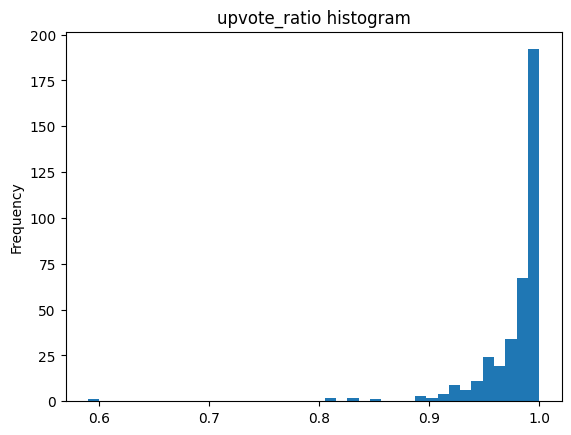

In [1101]:
df['upvote_ratio'].plot(kind='hist', title='upvote_ratio histogram', bins=40)

<Axes: title={'center': 'ups histogram'}, ylabel='Frequency'>

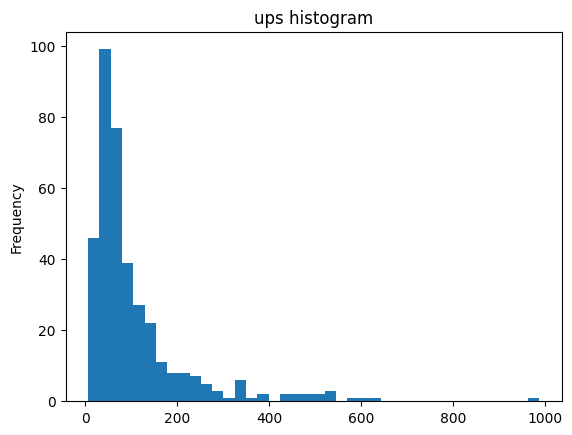

In [1102]:
df['ups'].plot(kind='hist', title='ups histogram', bins=40)

<Axes: title={'center': 'num_comments histogram'}, ylabel='Frequency'>

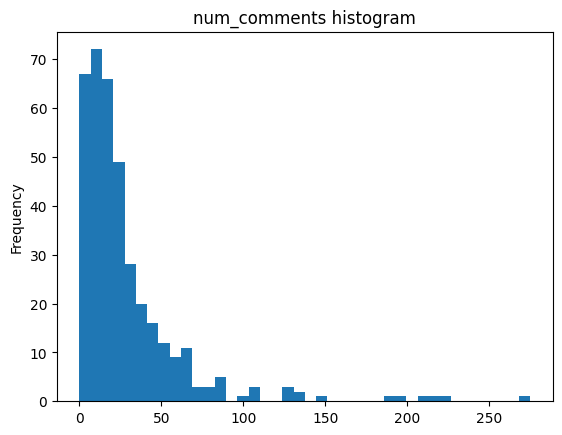

In [1104]:
df['num_comments'].plot(kind='hist', title='num_comments histogram', bins=40)

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, '')]]

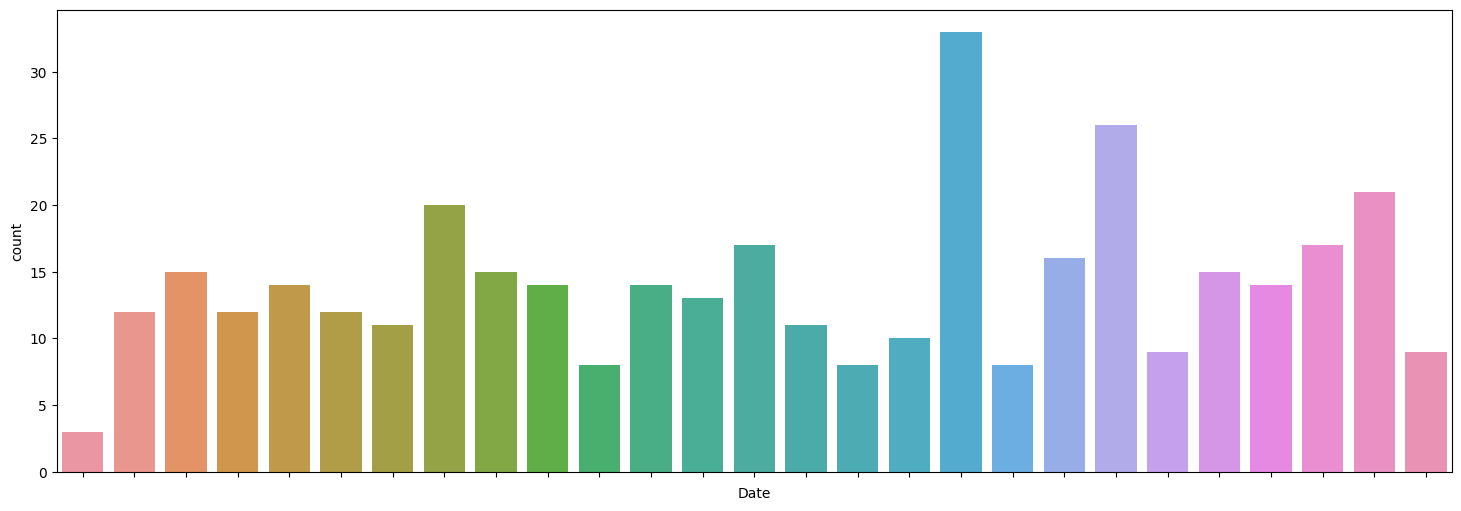

In [1107]:
fig, ax =plt.subplots(1,1, figsize=(18, 6))
sns.countplot(data=df, x="Date").set(xticklabels=[])

<Axes: title={'center': 'ups comments histogram'}, ylabel='Frequency'>

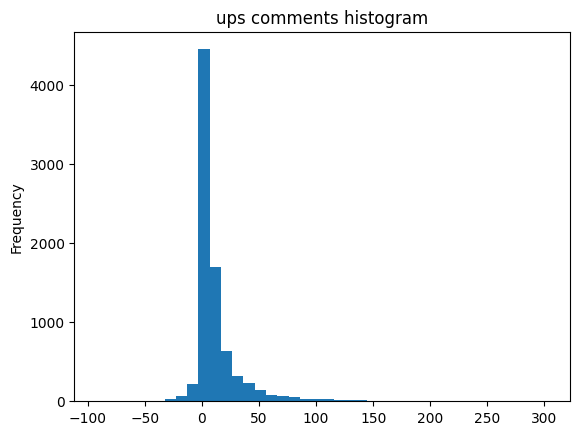

In [1110]:
df_comm['ups'].plot(kind='hist', title='ups comments histogram', bins=40)

# Data preparation for Sentiment

In [188]:
def preprocess_data(data):
    #remove numbers and turning words into lower case
    data= data.astype(str).str.replace('\d+','')
    lower_text= data.str.lower()
    lemmatizer= nltk.stem.WordNetLemmatizer()
    w_tokenizer= TweetTokenizer()

    #token lemmatization (ex. goes --> go)
    def lemmatize_text(text):
        return[(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

    #remove punctuation
    def remove_punctuation(words):
        new_words= []
        for word in words:
            new_word= re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words

    words= lower_text.apply(lemmatize_text)
    words= words.apply(remove_punctuation)
    return pd.DataFrame(words)

## Posts

In [189]:
#apply preprocess_data function
pre_r= preprocess_data(df['title'])
df['text_proc']= pre_r

#delete english stopwords
stop_words= set(stopwords.words('english'))
df['text_proc']= df['text_proc'].apply(lambda x: [item for item in x if item not in stop_words])

In [190]:
# stopwords removal
stop =stopwords.words('english')
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [191]:
def preprocess(tokenized_sentence):
  return [item for item in tokenized_sentence if item not in stop] #remove stopwords

df['text_proc'] = df['text_proc'].apply(preprocess)

In [192]:
# lemmatization
lemmatizer = WordNetLemmatizer()
punctuation = string.punctuation
print(punctuation)

def preprocess(tokenized_sentence, stopwords=[]):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in set(stopwords)] #remove stopwords and lowercase
  x = [item.lower() for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation
  return [lemmatizer.lemmatize(item) for item in x]


df['text_proc'] = df['text_proc'].apply(lambda x: preprocess(x, stopwords=stop))


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [193]:
df.head()

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time,text_proc
0,Milan Primavera just drew 0-0 vs Roma Primaver...,NaN,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45,"[milan, primavera, drew, 00, v, rom, primavera..."
1,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28,"[rivalry, watch, serie, matchday, 22, 202324]"
2,[DiMarzio] For Origi to Los Angeles FC: total ...,NaN,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38,"[dimarzio, origi, los, angeles, fc, total, agr..."
3,[DiMarzio] Pellegrino could join Verona after ...,NaN,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22,"[dimarzio, pellegrino, could, join, verona, co..."
4,[Bianchin] Milan is trying to buy Buba Sangaré...,NaN,0.95,41,0,41,Claija79,2024-01-26 21:39:21,1absava,t3_1absava,13,2024-01-26,21:39:21,"[bianchin, milan, trying, buy, buba, sangaré, ..."


## Comments

In [21]:
df_comm.head()

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,88,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment
1,t1_kjsp97c,TeoN72,t2_iru7bb,62,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,61,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment
3,t1_kjt6jye,Bejliii,[deleted],18,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda,subcomment
4,t1_kjsufw5,Chillinthamost,t2_aztik,21,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...,subcomment


In [22]:
#apply preprocess_data function
pre_r= preprocess_data(df_comm['body'])
df_comm['text_proc']= pre_r

#delete english stopwords
stop_words= set(stopwords.words('english'))
df_comm['text_proc']= df_comm['text_proc'].apply(lambda x: [item for item in x if item not in stop_words])

In [23]:
df_comm['text_proc'] = df_comm['text_proc'].apply(preprocess)

In [24]:
# lemmatization
lemmatizer = WordNetLemmatizer()
punctuation = string.punctuation
print(punctuation)

def preprocess(tokenized_sentence, stopwords=[]):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in set(stopwords)] #remove stopwords and lowercase
  x = [item.lower() for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation
  return [lemmatizer.lemmatize(item) for item in x]


df_comm['text_proc'] = df_comm['text_proc'].apply(lambda x: preprocess(x, stopwords=stop))


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
df_comm['text_proc_str'] = 'boh'

In [26]:
i = 0

for row in df_comm.iterrows():
    df_comm.iloc[i,11]= ' '.join(str(el) for el in row[1]['text_proc'])
    i = i + 1

In [27]:
df_comm.head()

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,text_proc,text_proc_str
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,88,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,"[probably, hardest, period, abate, boy, promot...",probably hardest period abate boy promotion ke...
1,t1_kjsp97c,TeoN72,t2_iru7bb,62,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,"[following, primavera, lot, fact, first, team,...",following primavera lot fact first team taking...
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,61,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,"[sure, simic, zeroli, jimenez, top, level, pri...",sure simic zeroli jimenez top level primavera
3,t1_kjt6jye,Bejliii,[deleted],18,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda,subcomment,"[dont, forget, boy, camarda]",dont forget boy camarda
4,t1_kjsufw5,Chillinthamost,t2_aztik,21,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...,subcomment,"[would, say, losing, best, player, ha, definit...",would say losing best player ha definitely con...


# Wordclouds

In [28]:
all_words = df['text_proc'].explode().tolist()
all_words

['milan',
 'primavera',
 'drew',
 '00',
 'v',
 'rom',
 'primavera',
 'extend',
 '4',
 'match',
 'nonwinning',
 'streak',
 'winning',
 'last',
 '8',
 'match',
 'rivalry',
 'watch',
 'serie',
 'matchday',
 '22',
 '202324',
 'dimarzio',
 'origi',
 'los',
 'angeles',
 'fc',
 'total',
 'agreement',
 'club',
 'still',
 'lacking',
 'loan',
 'obligation',
 'buy',
 'figure',
 'around',
 '5m',
 'possible',
 'dimarzio',
 'pellegrino',
 'could',
 'join',
 'verona',
 'contact',
 'took',
 'place',
 'milan',
 'last',
 'hour',
 'bianchin',
 'milan',
 'trying',
 'buy',
 'buba',
 'sangaré',
 'levantes',
 'rightback',
 'class',
 '2007',
 'minute',
 'segunda',
 'cost',
 '15',
 '2',
 'million',
 'arrigo',
 'sacchi',
 'coaching',
 'milan',
 'megaphone',
 'bianchin',
 'milan',
 'formation',
 'third',
 'consecutive',
 'game',
 'summer',
 'kjaer',
 'gabbia',
 'central',
 'pair',
 'adli',
 'reijnders',
 'key',
 'midfield',
 'classic',
 'attack',
 '910',
 '11',
 'moretto',
 'last',
 'hour',
 'lausanne',
 'ha',
 

In [29]:
fdist= FreqDist(all_words)
fdist

FreqDist({'milan': 211, 'ha': 59, 'ac': 44, 'player': 42, 'loan': 36, 'club': 34, 'team': 29, 'dimarzio': 26, 'maignan': 26, 'moretto': 25, ...})

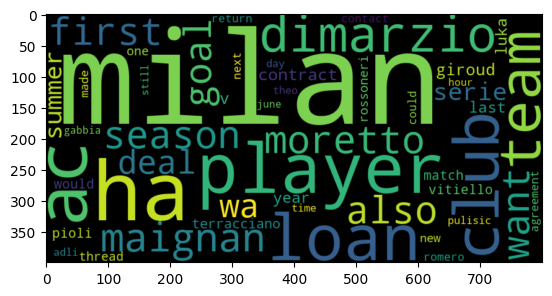

In [30]:
#WordCloud
wc= WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Sentiment posts

In [31]:
df.head()

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time,text_proc
0,Milan Primavera just drew 0-0 vs Roma Primaver...,NaN,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45,"[milan, primavera, drew, 00, v, rom, primavera..."
1,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28,"[rivalry, watch, serie, matchday, 22, 202324]"
2,[DiMarzio] For Origi to Los Angeles FC: total ...,NaN,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38,"[dimarzio, origi, los, angeles, fc, total, agr..."
3,[DiMarzio] Pellegrino could join Verona after ...,NaN,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22,"[dimarzio, pellegrino, could, join, verona, co..."
4,[Bianchin] Milan is trying to buy Buba Sangaré...,NaN,0.95,41,0,41,Claija79,2024-01-26 21:39:21,1absava,t3_1absava,13,2024-01-26,21:39:21,"[bianchin, milan, trying, buy, buba, sangaré, ..."


## AFINN Lexicon Base Approach

In [194]:
df["text_proc_str"] = "boh"

In [195]:
afinn = Afinn()

In [196]:
i = 0

for row in df.iterrows():
    df.iloc[i,14]= ' '.join(str(el) for el in row[1]['text_proc'])
    i = i + 1

In [197]:
df.head()

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time,text_proc,text_proc_str
0,Milan Primavera just drew 0-0 vs Roma Primaver...,NaN,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45,"[milan, primavera, drew, 00, v, rom, primavera...",milan primavera drew 00 v rom primavera extend...
1,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28,"[rivalry, watch, serie, matchday, 22, 202324]",rivalry watch serie matchday 22 202324
2,[DiMarzio] For Origi to Los Angeles FC: total ...,NaN,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38,"[dimarzio, origi, los, angeles, fc, total, agr...",dimarzio origi los angeles fc total agreement ...
3,[DiMarzio] Pellegrino could join Verona after ...,NaN,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22,"[dimarzio, pellegrino, could, join, verona, co...",dimarzio pellegrino could join verona contact ...
4,[Bianchin] Milan is trying to buy Buba Sangaré...,NaN,0.95,41,0,41,Claija79,2024-01-26 21:39:21,1absava,t3_1absava,13,2024-01-26,21:39:21,"[bianchin, milan, trying, buy, buba, sangaré, ...",bianchin milan trying buy buba sangaré levante...


In [198]:
df['text_sent'] = df['text_proc_str'].apply(afinn.score)
df.head()

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time,text_proc,text_proc_str,text_sent
0,Milan Primavera just drew 0-0 vs Roma Primaver...,NaN,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45,"[milan, primavera, drew, 00, v, rom, primavera...",milan primavera drew 00 v rom primavera extend...,5.0
1,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28,"[rivalry, watch, serie, matchday, 22, 202324]",rivalry watch serie matchday 22 202324,0.0
2,[DiMarzio] For Origi to Los Angeles FC: total ...,NaN,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38,"[dimarzio, origi, los, angeles, fc, total, agr...",dimarzio origi los angeles fc total agreement ...,1.0
3,[DiMarzio] Pellegrino could join Verona after ...,NaN,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22,"[dimarzio, pellegrino, could, join, verona, co...",dimarzio pellegrino could join verona contact ...,1.0
4,[Bianchin] Milan is trying to buy Buba Sangaré...,NaN,0.95,41,0,41,Claija79,2024-01-26 21:39:21,1absava,t3_1absava,13,2024-01-26,21:39:21,"[bianchin, milan, trying, buy, buba, sangaré, ...",bianchin milan trying buy buba sangaré levante...,0.0


<Axes: title={'center': 'Sentiment AFINN histogram'}, ylabel='Frequency'>

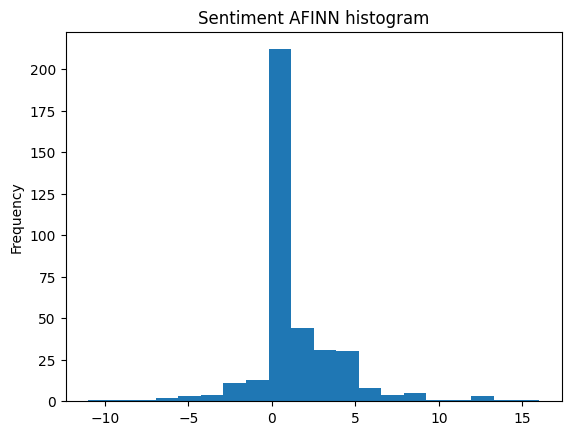

In [790]:
df['text_sent'].plot(kind='hist', title='Sentiment AFINN histogram', bins=20)

## Opinion Lexicon

In [199]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [200]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences:
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)]


    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [201]:
df['text_sent_2'] = df["text_proc_str"].apply(sentiment_neg)

In [202]:
df.head()

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time,text_proc,text_proc_str,text_sent,text_sent_2
0,Milan Primavera just drew 0-0 vs Roma Primaver...,NaN,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45,"[milan, primavera, drew, 00, v, rom, primavera...",milan primavera drew 00 v rom primavera extend...,5.0,1
1,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28,"[rivalry, watch, serie, matchday, 22, 202324]",rivalry watch serie matchday 22 202324,0.0,-1
2,[DiMarzio] For Origi to Los Angeles FC: total ...,NaN,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38,"[dimarzio, origi, los, angeles, fc, total, agr...",dimarzio origi los angeles fc total agreement ...,1.0,-1
3,[DiMarzio] Pellegrino could join Verona after ...,NaN,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22,"[dimarzio, pellegrino, could, join, verona, co...",dimarzio pellegrino could join verona contact ...,1.0,0
4,[Bianchin] Milan is trying to buy Buba Sangaré...,NaN,0.95,41,0,41,Claija79,2024-01-26 21:39:21,1absava,t3_1absava,13,2024-01-26,21:39:21,"[bianchin, milan, trying, buy, buba, sangaré, ...",bianchin milan trying buy buba sangaré levante...,0.0,0


<Axes: title={'center': 'Sentiment Opinion Lexicon histogram'}, ylabel='Frequency'>

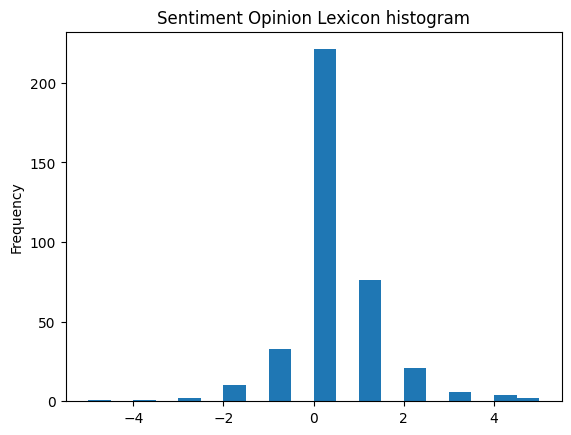

In [800]:
df['text_sent_2'].plot(kind='hist', title='Sentiment Opinion Lexicon histogram', bins=20)

## Dictionary based emotion detection

In [84]:
def get_emotions(sentence):
  text_object = NRCLex(sentence)
  return text_object.raw_emotion_scores

In [85]:
df['text_sent_3'] = df['text_proc_str'].apply(get_emotions) #not sentiment!

In [86]:
df.head()

,title,selftext,upvote_ratio,ups,downs,score,author,date_and_time,user_id,kind_id,num_comments,Date,Time,text_proc,text_proc_str,text_sent,text_sent_2,text_sent_3
0,Milan Primavera just drew 0-0 vs Roma Primaver...,NaN,0.95,32,0,32,HommoFroggy,2024-01-27 13:01:45,1ac9dck,t3_1ac9dck,18,2024-01-27,13:01:45,"[milan, primavera, drew, 00, v, rom, primavera...",milan primavera drew 00 v rom primavera extend...,5.0,1,"{'positive': 2, 'anticipation': 1, 'disgust': ..."
1,[Rivalry Watch] Serie A Matchday 22 | 2023/24,&amp;#x200B;\n\n|Day|Home|Away|\n|:-|:-|:-|\n|...,1.00,11,0,11,HeirOfRhoads,2024-01-27 07:25:28,1ac4esd,t3_1ac4esd,7,2024-01-27,07:25:28,"[rivalry, watch, serie, matchday, 22, 202324]",rivalry watch serie matchday 22 202324,0.0,-1,"{'anger': 1, 'negative': 1, 'anticipation': 1,..."
2,[DiMarzio] For Origi to Los Angeles FC: total ...,NaN,0.97,56,0,56,Claija79,2024-01-27 00:24:38,1abw72s,t3_1abw72s,19,2024-01-27,00:24:38,"[dimarzio, origi, los, angeles, fc, total, agr...",dimarzio origi los angeles fc total agreement ...,1.0,-1,"{'positive': 1, 'trust': 1, 'negative': 1}"
3,[DiMarzio] Pellegrino could join Verona after ...,NaN,0.95,36,0,36,Claija79,2024-01-26 23:33:22,1abv03z,t3_1abv03z,15,2024-01-26,23:33:22,"[dimarzio, pellegrino, could, join, verona, co...",dimarzio pellegrino could join verona contact ...,1.0,0,{'positive': 2}
4,[Bianchin] Milan is trying to buy Buba Sangaré...,NaN,0.95,41,0,41,Claija79,2024-01-26 21:39:21,1absava,t3_1absava,13,2024-01-26,21:39:21,"[bianchin, milan, trying, buy, buba, sangaré, ...",bianchin milan trying buy buba sangaré levante...,0.0,0,{}


In [87]:
df_sent3 = df['text_sent_3'].apply(pd.Series)
df_sent3.fillna(0, inplace=True)
df_sent3

,positive,anticipation,disgust,joy,sadness,surprise,trust,anger,negative,fear
0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
372,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
373,4.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0
374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [88]:
df_def = pd.concat([df, df_sent3], axis=1)

In [89]:
print('The post have in total ' + str(format(round(df_def['positive'].sum(), 2))) + ' positive')
print('The post have in total ' + str(format(round(df_def['anticipation'].sum(), 2))) + ' anticipation')
print('The post have in total ' + str(format(round(df_def['disgust'].sum(), 2))) + ' disgust')
print('The post have in total ' + str(format(round(df_def['joy'].sum(), 2))) + ' joy')
print('The post have in total ' + str(format(round(df_def['sadness'].sum(), 2))) + ' sadness')
print('The post have in total ' + str(format(round(df_def['surprise'].sum(), 2))) + ' surprise')
print('The post have in total ' + str(format(round(df_def['trust'].sum(), 2))) + ' trust')
print('The post have in total ' + str(format(round(df_def['anger'].sum(), 2))) + ' anger')
print('The post have in total ' + str(format(round(df_def['negative'].sum(), 2))) + ' negative')
print('The post have in total ' + str(format(round(df_def['fear'].sum(), 2))) + ' fear')

The post have in total 434.0 positive
The post have in total 220.0 anticipation
The post have in total 39.0 disgust
The post have in total 118.0 joy
The post have in total 75.0 sadness
The post have in total 93.0 surprise
The post have in total 268.0 trust
The post have in total 64.0 anger
The post have in total 178.0 negative
The post have in total 94.0 fear


In [91]:
print('The post are generally ' + str(format(round(df_def['positive'].mean(), 2))) + ' positive')
print('The post are generally ' + str(format(round(df_def['anticipation'].mean(), 2))) + ' anticipation')
print('The post are generally ' + str(format(round(df_def['disgust'].mean(), 2))) + ' disgust')
print('The post are generally ' + str(format(round(df_def['joy'].mean(), 2))) + ' joy')
print('The post are generally ' + str(format(round(df_def['sadness'].mean(), 2))) + ' sadness')
print('The post are generally ' + str(format(round(df_def['surprise'].mean(), 2))) + ' surprise')
print('The post are generally ' + str(format(round(df_def['trust'].mean(), 2))) + ' trust')
print('The post are generally ' + str(format(round(df_def['anger'].mean(), 2))) + ' anger')
print('The post are generally ' + str(format(round(df_def['negative'].mean(), 2))) + ' negative')
print('The post are generally ' + str(format(round(df_def['fear'].mean(), 2))) + ' fear')

The post are generally 1.15 positive
The post are generally 0.58 anticipation
The post are generally 0.1 disgust
The post are generally 0.31 joy
The post are generally 0.2 sadness
The post are generally 0.25 surprise
The post are generally 0.71 trust
The post are generally 0.17 anger
The post are generally 0.47 negative
The post are generally 0.25 fear


<Axes: xlabel='trust', ylabel='count'>

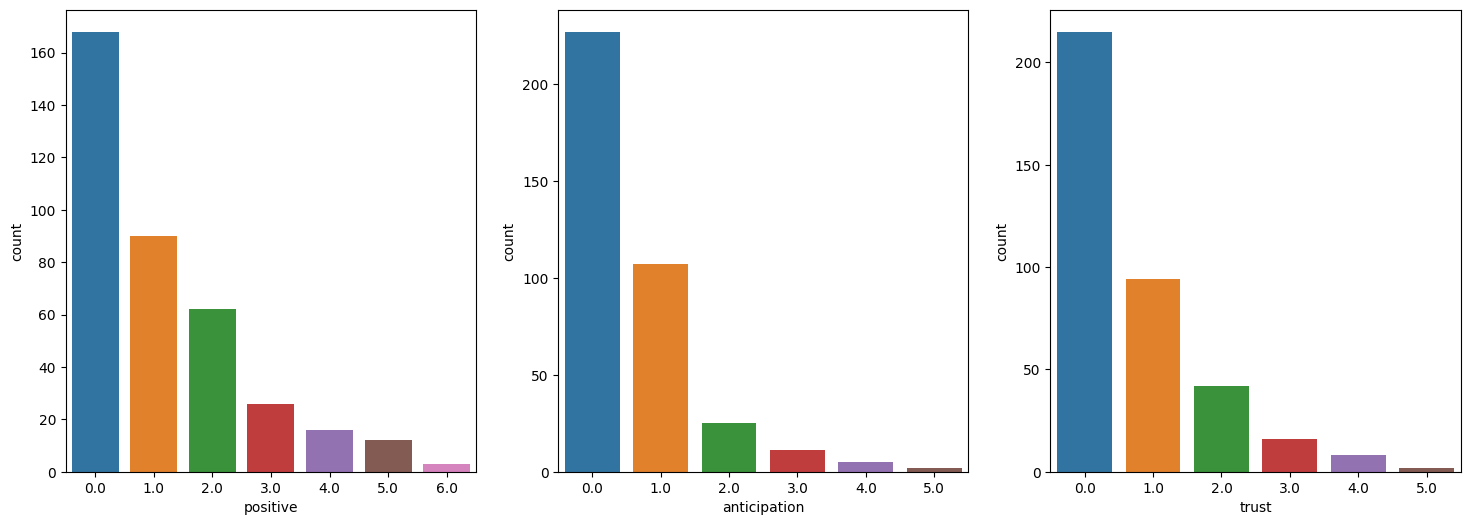

In [883]:
fig, ax =plt.subplots(1,3, figsize=(18, 6))

sns.countplot(data=df_def, x="positive", ax=ax[0])
sns.countplot(data=df_def, x="anticipation", ax=ax[1])
sns.countplot(data=df_def, x="trust", ax=ax[2])

<Axes: xlabel='surprise', ylabel='count'>

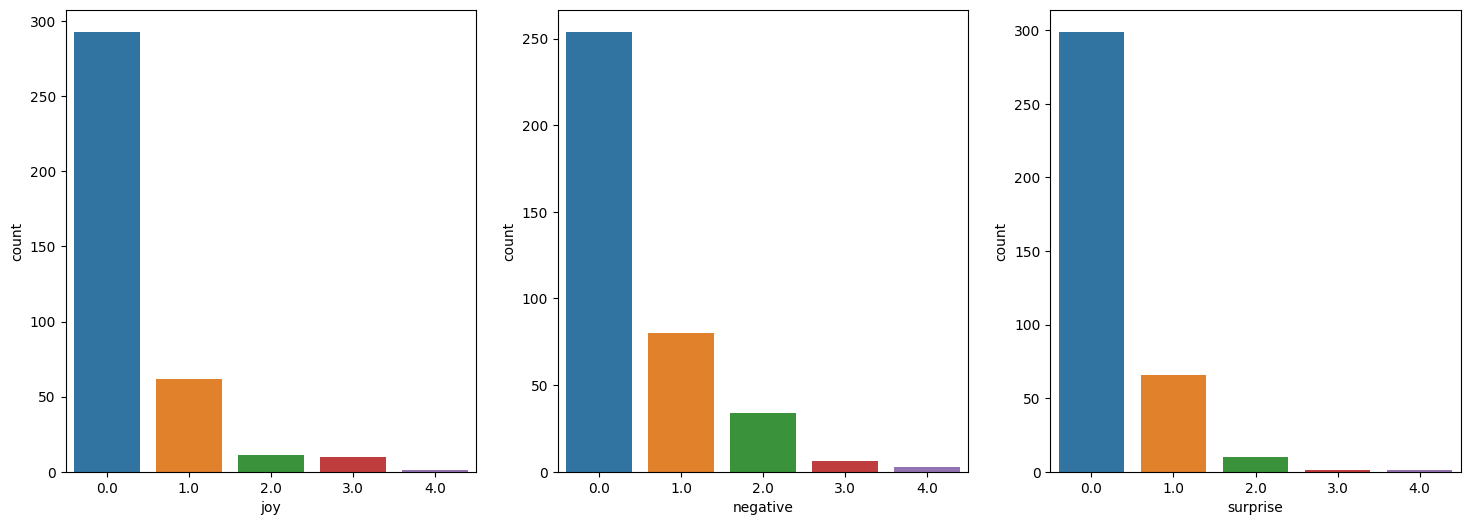

In [881]:
fig, ax =plt.subplots(1,3, figsize=(18, 6))

sns.countplot(data=df_def, x="joy", ax=ax[0])
sns.countplot(data=df_def, x="negative", ax=ax[1])
sns.countplot(data=df_def, x="surprise", ax=ax[2])

<Axes: xlabel='disgust', ylabel='count'>

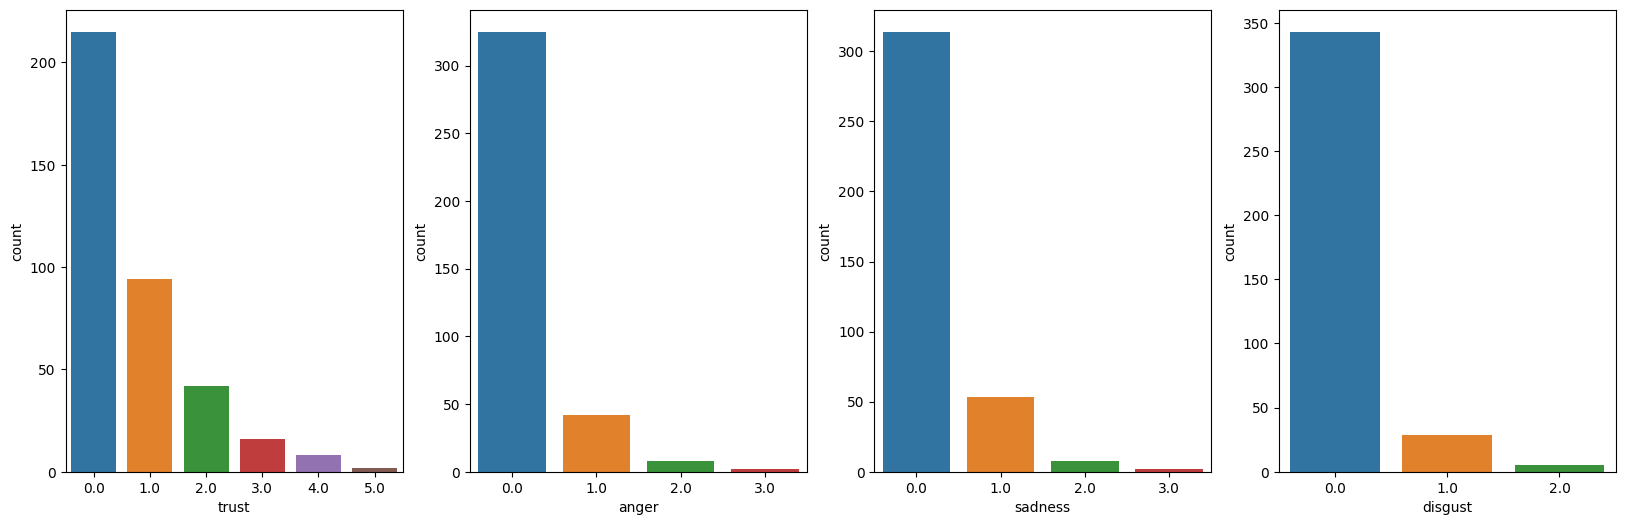

In [880]:
fig, ax =plt.subplots(1,4, figsize=(20, 6))

sns.countplot(data=df_def, x="fear", ax=ax[0])
sns.countplot(data=df_def, x="anger", ax=ax[1])
sns.countplot(data=df_def, x="sadness", ax=ax[2])
sns.countplot(data=df_def, x="disgust", ax=ax[3])

## Evaluations

In [92]:
# Compute 3-class confusion matrix
confusion = pd.crosstab(np.sign(df['text_sent']), np.sign(df['text_sent_2']))
confusion

text_sent_2,-1,0,1
text_sent,,,
-1.0,25,10,1
0.0,16,150,13
1.0,6,61,95


In [100]:
# Compute 2-class confusion matrix
confusion_2_class = confusion.iloc[[0, 2], [0, 2]]
confusion_2_class

text_sent_2,-1,1
text_sent,,
-1.0,25,1
1.0,6,95


In [102]:
accuracy_3_class = np.sum(np.diag(confusion)) / np.sum(confusion.values)
accuracy_2_class_bing = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)

print(accuracy_3_class)
print(accuracy_2_class_bing)

0.7161803713527851
0.9448818897637795


# Sentiment comments

In [38]:
df_comm

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,text_proc,text_proc_str
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,88,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,"[probably, hardest, period, abate, boy, promot...",probably hardest period abate boy promotion ke...
1,t1_kjsp97c,TeoN72,t2_iru7bb,62,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,"[following, primavera, lot, fact, first, team,...",following primavera lot fact first team taking...
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,61,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,"[sure, simic, zeroli, jimenez, top, level, pri...",sure simic zeroli jimenez top level primavera
3,t1_kjt6jye,Bejliii,[deleted],18,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda,subcomment,"[dont, forget, boy, camarda]",dont forget boy camarda
4,t1_kjsufw5,Chillinthamost,t2_aztik,21,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...,subcomment,"[would, say, losing, best, player, ha, definit...",would say losing best player ha definitely con...
...,...,...,...,...,...,...,...,...,...,...,...,...
8156,t1_kfs481x,Claija79,t2_122yao,14,0,t3_18vlkk4,t3_18vlkk4,kfs481x,happy new year hermanos ❤️🖤,comment,"[happy, new, year, hermanos]",happy new year hermanos
8157,t1_kfs1mba,BowieIsMyGod,t2_ebipgu8s,7,0,t3_18vlkk4,t3_18vlkk4,kfs1mba,Happy New Year 🎇\n\nMay we win a trophy in 202...,comment,"[happy, new, year, may, win, trophy, 2024]",happy new year may win trophy 2024
8158,t1_kfs0fl3,BredIN919,t2_942i9gwv,7,0,t3_18vlkk4,t3_18vlkk4,kfs0fl3,Hopefully pioli won’t be our coach end of 2024,comment,"[hopefully, pioli, coach, end, 2024]",hopefully pioli coach end 2024
8159,t1_kfs1cuf,BowieIsMyGod,t2_ebipgu8s,4,0,t1_kfs0fl3,t3_18vlkk4,kfs1cuf,He will be sacked at the end of the season.,subcomment,"[sacked, end, season]",sacked end season


## AFINN Lexicon Base Approach

In [40]:
afinn = Afinn()

In [41]:
df_comm['text_sent'] = df_comm['text_proc_str'].apply(afinn.score)
df_comm.head()

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,text_proc,text_proc_str,text_sent
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,88,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,"[probably, hardest, period, abate, boy, promot...",probably hardest period abate boy promotion ke...,0.0
1,t1_kjsp97c,TeoN72,t2_iru7bb,62,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,"[following, primavera, lot, fact, first, team,...",following primavera lot fact first team taking...,0.0
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,61,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,"[sure, simic, zeroli, jimenez, top, level, pri...",sure simic zeroli jimenez top level primavera,2.0
3,t1_kjt6jye,Bejliii,[deleted],18,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda,subcomment,"[dont, forget, boy, camarda]",dont forget boy camarda,-1.0
4,t1_kjsufw5,Chillinthamost,t2_aztik,21,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...,subcomment,"[would, say, losing, best, player, ha, definit...",would say losing best player ha definitely con...,-1.0


<Axes: title={'center': 'Sentiment AFINN histogram'}, ylabel='Frequency'>

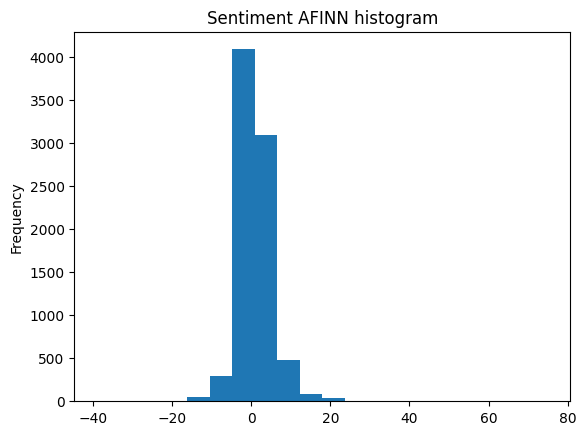

In [42]:
df_comm['text_sent'].plot(kind='hist', title='Sentiment AFINN histogram', bins=20)

## Opinion Lexicon

In [43]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [44]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences:
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)]


    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [45]:
df_comm['text_sent_2'] = df_comm["text_proc_str"].apply(sentiment_neg)

In [46]:
df_comm.head()

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,text_proc,text_proc_str,text_sent,text_sent_2
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,88,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,"[probably, hardest, period, abate, boy, promot...",probably hardest period abate boy promotion ke...,0.0,0
1,t1_kjsp97c,TeoN72,t2_iru7bb,62,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,"[following, primavera, lot, fact, first, team,...",following primavera lot fact first team taking...,0.0,0
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,61,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,"[sure, simic, zeroli, jimenez, top, level, pri...",sure simic zeroli jimenez top level primavera,2.0,1
3,t1_kjt6jye,Bejliii,[deleted],18,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda,subcomment,"[dont, forget, boy, camarda]",dont forget boy camarda,-1.0,0
4,t1_kjsufw5,Chillinthamost,t2_aztik,21,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...,subcomment,"[would, say, losing, best, player, ha, definit...",would say losing best player ha definitely con...,-1.0,-1


<Axes: title={'center': 'Sentiment Opinion Lexicon histogram'}, ylabel='Frequency'>

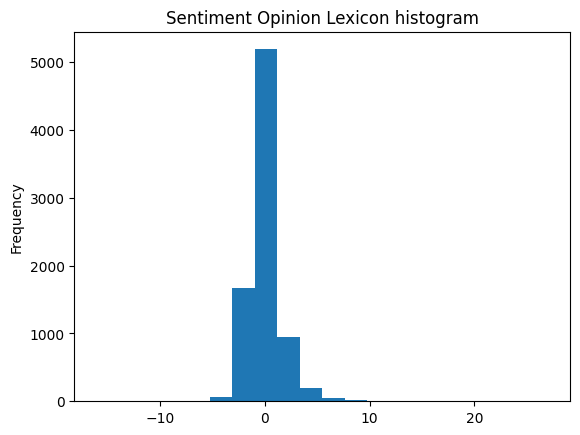

In [47]:
df_comm['text_sent_2'].plot(kind='hist', title='Sentiment Opinion Lexicon histogram', bins=20)

## Dictionary based emotion detection

In [48]:
def get_emotions(sentence):
  text_object = NRCLex(sentence)
  return text_object.raw_emotion_scores

In [49]:
df_comm['text_sent_3'] = df_comm['text_proc_str'].apply(get_emotions) #not sentiment!

In [50]:
df_comm.head()

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,text_proc,text_proc_str,text_sent,text_sent_2,text_sent_3
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,88,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,"[probably, hardest, period, abate, boy, promot...",probably hardest period abate boy promotion ke...,0.0,0,"{'disgust': 1, 'negative': 2, 'positive': 1, '..."
1,t1_kjsp97c,TeoN72,t2_iru7bb,62,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,"[following, primavera, lot, fact, first, team,...",following primavera lot fact first team taking...,0.0,0,"{'trust': 2, 'negative': 1}"
2,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,61,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,"[sure, simic, zeroli, jimenez, top, level, pri...",sure simic zeroli jimenez top level primavera,2.0,1,"{'anticipation': 1, 'positive': 2, 'trust': 2}"
3,t1_kjt6jye,Bejliii,[deleted],18,0,t1_kjsuich,t3_1ac9dck,kjt6jye,Don't forget our boy Camarda,subcomment,"[dont, forget, boy, camarda]",dont forget boy camarda,-1.0,0,"{'negative': 2, 'disgust': 1}"
4,t1_kjsufw5,Chillinthamost,t2_aztik,21,0,t1_kjsp97c,t3_1ac9dck,kjsufw5,I would say losing their best players has defi...,subcomment,"[would, say, losing, best, player, ha, definit...",would say losing best player ha definitely con...,-1.0,-1,"{'anger': 2, 'negative': 3, 'sadness': 2}"


In [51]:
df_comm_sent3 = df_comm['text_sent_3'].apply(pd.Series)
df_comm_sent3.fillna(0, inplace=True)
df_comm_sent3

,disgust,negative,positive,anticipation,trust,anger,sadness,joy,surprise,fear
0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8156,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
8157,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0
8158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_comm_def = pd.concat([df_comm, df_comm_sent3], axis=1)

In [54]:
print('The post have in total ' + str(format(round(df_comm_def['positive'].sum(), 2))) + ' positive')
print('The post have in total ' + str(format(round(df_comm_def['anticipation'].sum(), 2))) + ' anticipation')
print('The post have in total ' + str(format(round(df_comm_def['disgust'].sum(), 2))) + ' disgust')
print('The post have in total ' + str(format(round(df_comm_def['joy'].sum(), 2))) + ' joy')
print('The post have in total ' + str(format(round(df_comm_def['sadness'].sum(), 2))) + ' sadness')
print('The post have in total ' + str(format(round(df_comm_def['surprise'].sum(), 2))) + ' surprise')
print('The post have in total ' + str(format(round(df_comm_def['trust'].sum(), 2))) + ' trust')
print('The post have in total ' + str(format(round(df_comm_def['anger'].sum(), 2))) + ' anger')
print('The post have in total ' + str(format(round(df_comm_def['negative'].sum(), 2))) + ' negative')
print('The post have in total ' + str(format(round(df_comm_def['fear'].sum(), 2))) + ' fear')

The post have in total 9817.0 positive
The post have in total 5902.0 anticipation
The post have in total 2148.0 disgust
The post have in total 4155.0 joy
The post have in total 3710.0 sadness
The post have in total 3042.0 surprise
The post have in total 6980.0 trust
The post have in total 3375.0 anger
The post have in total 7828.0 negative
The post have in total 3640.0 fear


In [56]:
print('The post are generally ' + str(format(round(df_comm_def['positive'].mean(), 2))) + ' positive')
print('The post are generally ' + str(format(round(df_comm_def['anticipation'].mean(), 2))) + ' anticipation')
print('The post are generally ' + str(format(round(df_comm_def['disgust'].mean(), 2))) + ' disgust')
print('The post are generally ' + str(format(round(df_comm_def['joy'].mean(), 2))) + ' joy')
print('The post are generally ' + str(format(round(df_comm_def['sadness'].mean(), 2))) + ' sadness')
print('The post are generally ' + str(format(round(df_comm_def['surprise'].mean(), 2))) + ' surprise')
print('The post are generally ' + str(format(round(df_comm_def['trust'].mean(), 2))) + ' trust')
print('The post are generally ' + str(format(round(df_comm_def['anger'].mean(), 2))) + ' anger')
print('The post are generally ' + str(format(round(df_comm_def['negative'].mean(), 2))) + ' negative')
print('The post are generally ' + str(format(round(df_comm_def['fear'].mean(), 2))) + ' fear')

The post are generally 1.2 positive
The post are generally 0.72 anticipation
The post are generally 0.26 disgust
The post are generally 0.51 joy
The post are generally 0.45 sadness
The post are generally 0.37 surprise
The post are generally 0.86 trust
The post are generally 0.41 anger
The post are generally 0.96 negative
The post are generally 0.45 fear


[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, '')]]

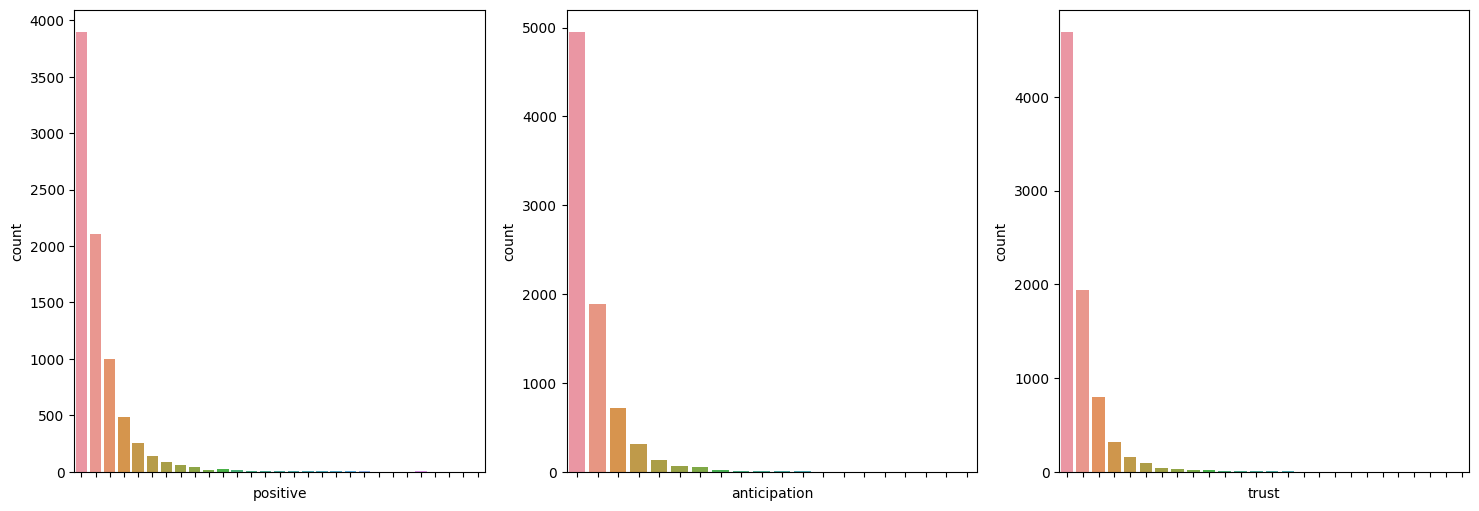

In [58]:
fig, ax =plt.subplots(1,3, figsize=(18, 6))

sns.countplot(data=df_comm_def, x="positive", ax=ax[0]).set(xticklabels=[])
sns.countplot(data=df_comm_def, x="anticipation", ax=ax[1]).set(xticklabels=[])
sns.countplot(data=df_comm_def, x="trust", ax=ax[2]).set(xticklabels=[])

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, '')]]

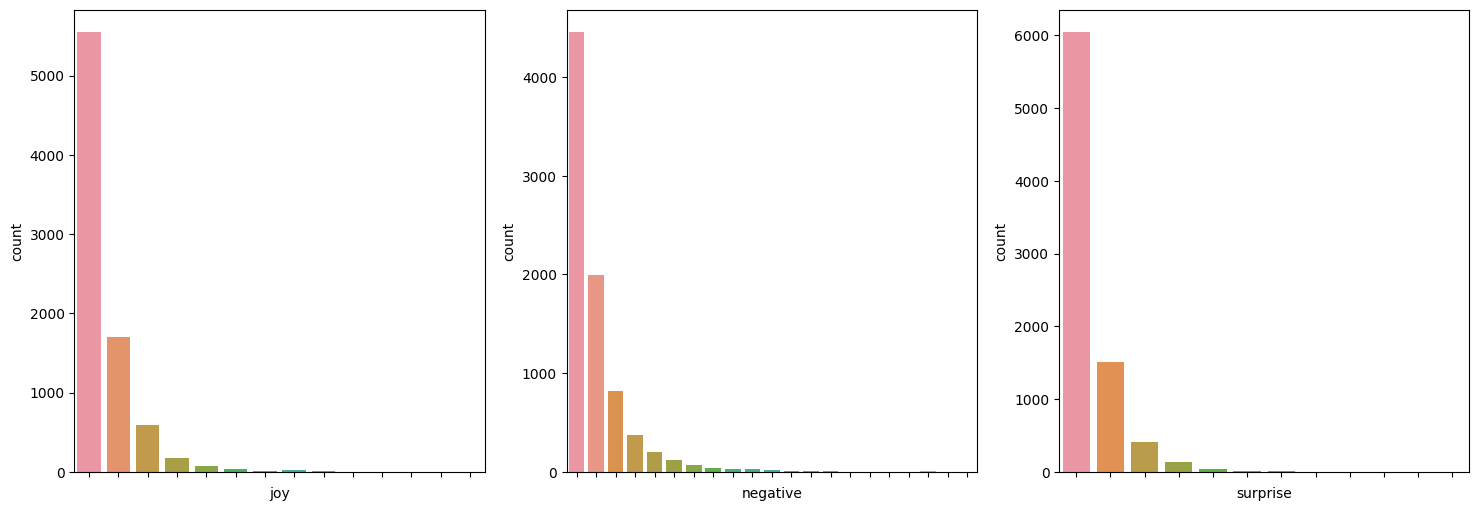

In [59]:
fig, ax =plt.subplots(1,3, figsize=(18, 6))

sns.countplot(data=df_comm_def, x="joy", ax=ax[0]).set(xticklabels=[])
sns.countplot(data=df_comm_def, x="negative", ax=ax[1]).set(xticklabels=[])
sns.countplot(data=df_comm_def, x="surprise", ax=ax[2]).set(xticklabels=[])

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, '')]]

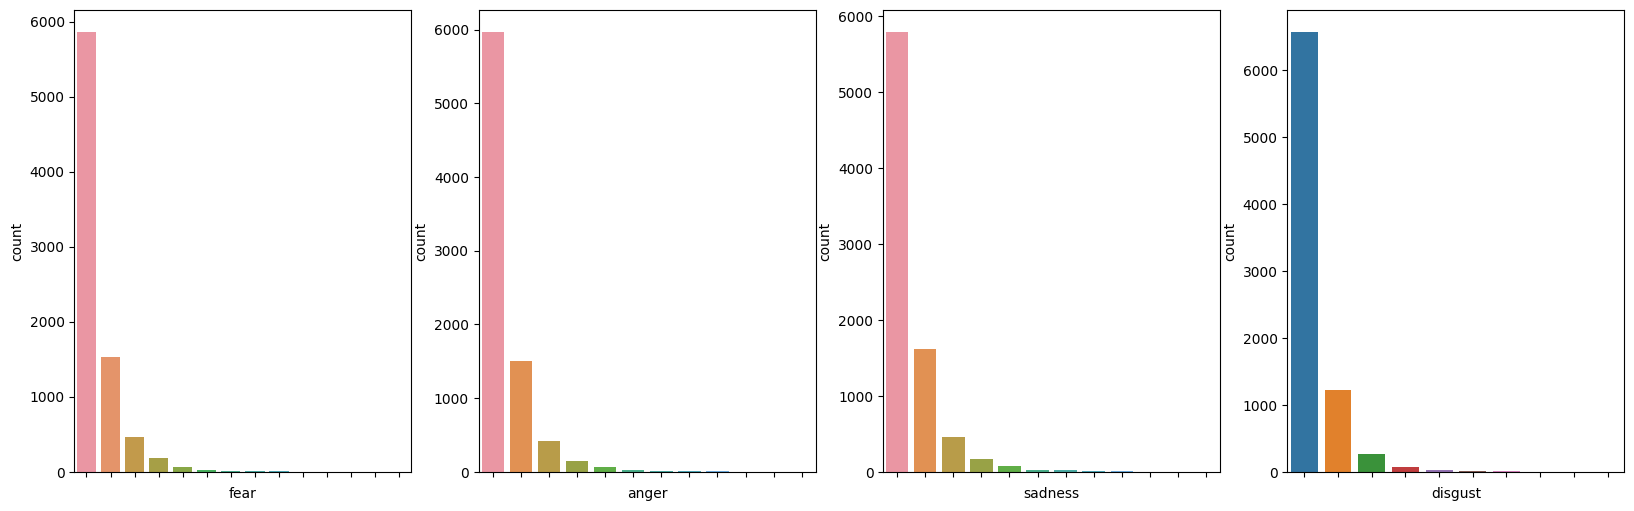

In [60]:
fig, ax =plt.subplots(1,4, figsize=(20, 6))

sns.countplot(data=df_comm_def, x="fear", ax=ax[0]).set(xticklabels=[])
sns.countplot(data=df_comm_def, x="anger", ax=ax[1]).set(xticklabels=[])
sns.countplot(data=df_comm_def, x="sadness", ax=ax[2]).set(xticklabels=[])
sns.countplot(data=df_comm_def, x="disgust", ax=ax[3]).set(xticklabels=[])

## Evaluations

In [61]:
# Compute 3-class confusion matrix
confusion_comm = pd.crosstab(np.sign(df_comm['text_sent']), np.sign(df_comm['text_sent_2']))
confusion_comm

text_sent_2,-1,0,1
text_sent,,,
-1.0,1217,384,145
0.0,265,2091,346
1.0,274,958,2481


In [62]:
# Compute 2-class confusion matrix
confusion_comm_2_class = confusion_comm.iloc[[0, 2], [0, 2]]
confusion_comm_2_class

text_sent_2,-1,1
text_sent,,
-1.0,1217,145
1.0,274,2481


In [63]:
accuracy_comm_3_class = np.sum(np.diag(confusion_comm)) / np.sum(confusion_comm.values)
accuracy_comm_2_class_bing = np.sum(np.diag(confusion_comm_2_class)) / np.sum(confusion_comm_2_class.values)

print(accuracy_comm_3_class)
print(accuracy_comm_2_class_bing)

0.709349344443083
0.8982268642215205


# Community Graph

In [120]:
df_p = comments[0::2]

In [121]:
post_author = []
post_author_id = []
post_name = []

In [122]:
# loop through each post retrieved from GET request
for post in df_p:
    if post[0]['kind'] == 't3':
        post_author.append(post[0]['data']['author'])
        post_name.append(post[0]['data']['name'])
        if post[0]['data']['title'] == '[cancellato]':             
            post_author_id.append('[deleted]')
        elif post[0]['data']['title'] != '[cancellato]':
            if 'author_fullname' in post[0]['data'].keys():
                post_author_id.append(post[0]['data']['author_fullname'])
            else:
                post_author_id.append('[not available]')
        else:
            post_author_id.append('[deleted]')

In [123]:
dict = {'post_author': post_author, 'post_author_id': post_author_id, 'post_name': post_name} 
    
df_post = pd.DataFrame(dict)

In [125]:
df_post

,post_author,post_author_id,post_name
0,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
1,HeirOfRhoads,t2_1w60f54n,t3_1ac4esd
2,Claija79,t2_122yao,t3_1abw72s
3,Claija79,t2_122yao,t3_1abv03z
4,Claija79,t2_122yao,t3_1absava
...,...,...,...
431,Swimmer4052,t2_q2w2b23ao,t3_18vy0y6
432,HeirOfRhoads,t2_1w60f54n,t3_18vw8s6
433,AutoModerator,t2_6l4z3,t3_18voilc
434,Claija79,t2_122yao,t3_18vmf8d


df_comm['link_id']    # post's link 

df_comm['parent_id']  # where the comment comes from (1° comment if = link_id, other comment if different than link_id)

df_comm['author_fullname']   # user id

In [126]:
df_cd = pd.merge(df_comm, df_post, left_on='link_id', right_on='post_name')
df_cd

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,post_author,post_author_id,post_name
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
1,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
2,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
3,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
4,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,62,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,t1_kfs481x,Claija79,t2_122yao,14,0,t3_18vlkk4,t3_18vlkk4,kfs481x,happy new year hermanos ❤️🖤,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12011,t1_kfs1mba,BowieIsMyGod,t2_ebipgu8s,6,0,t3_18vlkk4,t3_18vlkk4,kfs1mba,Happy New Year 🎇\n\nMay we win a trophy in 202...,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12012,t1_kfs0fl3,BredIN919,t2_942i9gwv,8,0,t3_18vlkk4,t3_18vlkk4,kfs0fl3,Hopefully pioli won’t be our coach end of 2024,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12013,t1_kfs1cuf,BowieIsMyGod,t2_ebipgu8s,5,0,t1_kfs0fl3,t3_18vlkk4,kfs1cuf,He will be sacked at the end of the season.,subcomment,mercurialsaliva,t2_38mt9,t3_18vlkk4


In [127]:
df_cd = df_cd.drop(df_cd[df_cd['author_fullname'] == '[deleted]'].index)
df_cd

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,post_author,post_author_id,post_name
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
1,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
2,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
3,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
4,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,62,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,t1_kfs481x,Claija79,t2_122yao,14,0,t3_18vlkk4,t3_18vlkk4,kfs481x,happy new year hermanos ❤️🖤,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12011,t1_kfs1mba,BowieIsMyGod,t2_ebipgu8s,6,0,t3_18vlkk4,t3_18vlkk4,kfs1mba,Happy New Year 🎇\n\nMay we win a trophy in 202...,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12012,t1_kfs0fl3,BredIN919,t2_942i9gwv,8,0,t3_18vlkk4,t3_18vlkk4,kfs0fl3,Hopefully pioli won’t be our coach end of 2024,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12013,t1_kfs1cuf,BowieIsMyGod,t2_ebipgu8s,5,0,t1_kfs0fl3,t3_18vlkk4,kfs1cuf,He will be sacked at the end of the season.,subcomment,mercurialsaliva,t2_38mt9,t3_18vlkk4


In [128]:
df_cd = df_cd.drop(df_cd[df_cd['author'] == '[deleted]'].index)
df_cd

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,post_author,post_author_id,post_name
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
1,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
2,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
3,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
4,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,62,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,t1_kfs481x,Claija79,t2_122yao,14,0,t3_18vlkk4,t3_18vlkk4,kfs481x,happy new year hermanos ❤️🖤,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12011,t1_kfs1mba,BowieIsMyGod,t2_ebipgu8s,6,0,t3_18vlkk4,t3_18vlkk4,kfs1mba,Happy New Year 🎇\n\nMay we win a trophy in 202...,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12012,t1_kfs0fl3,BredIN919,t2_942i9gwv,8,0,t3_18vlkk4,t3_18vlkk4,kfs0fl3,Hopefully pioli won’t be our coach end of 2024,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12013,t1_kfs1cuf,BowieIsMyGod,t2_ebipgu8s,5,0,t1_kfs0fl3,t3_18vlkk4,kfs1cuf,He will be sacked at the end of the season.,subcomment,mercurialsaliva,t2_38mt9,t3_18vlkk4


In [182]:
G = nx.from_pandas_edgelist(df_cd, "author", "post_author")

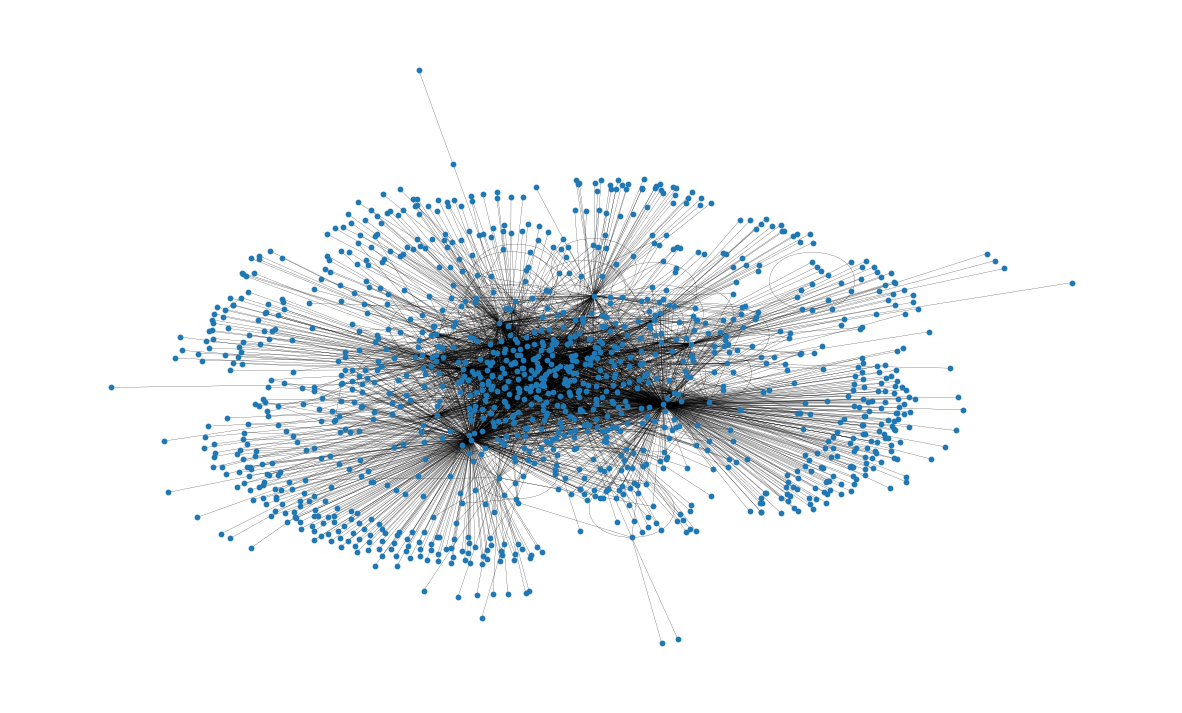

In [130]:
pos = nx.spring_layout(G, iterations=20)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_size= 10, with_labels= False, width= 0.15)

In [134]:
print(len(G.nodes()))
print(len(G.edges()))

1285
3615


## Betweenness Centrality

In [135]:
#Betweenness Centrality
bt_cen = nx.betweenness_centrality(G)
bt_cen2= pd.DataFrame(bt_cen.items(), columns=['node','bt_c'])

In [136]:
bt_cen2.sort_values(by='bt_c',ascending=False)[:15]

,node,bt_c
50,Claija79,0.383445
60,mercurialsaliva,0.340667
18,HeirOfRhoads,0.101225
308,x3bo9,0.074846
74,mankatvito,0.068762
163,AutoModerator,0.067221
38,etclipse,0.055821
48,TheItalianStallion64,0.039682
312,Plus_Way3128,0.037021
92,milanistaMK,0.029078


## Degree Centrality

In [137]:
#Degree Centrality
dg_cen = nx.degree_centrality(G)
dg_cen2= pd.DataFrame(dg_cen.items(), columns=['node','dg_c'])

In [138]:
dg_cen2.sort_values(by='dg_c',ascending=False)[:15]

,node,dg_c
50,Claija79,0.439252
60,mercurialsaliva,0.390966
18,HeirOfRhoads,0.193146
308,x3bo9,0.161994
163,AutoModerator,0.134735
38,etclipse,0.116822
74,mankatvito,0.102804
11,Munfury,0.080997
0,HommoFroggy,0.076324
12,Adeus_AyrtonsMother,0.074766


## Closeness Centrality

In [139]:
#Closeness Centrality
cl_cen = nx.closeness_centrality(G)
cl_cen2= pd.DataFrame(cl_cen.items(), columns=['node','cl_c'])

In [140]:
cl_cen2.sort_values(by='cl_c',ascending=False)[:15]

,node,cl_c
50,Claija79,0.608243
60,mercurialsaliva,0.593346
18,HeirOfRhoads,0.515870
163,AutoModerator,0.508314
308,x3bo9,0.504915
38,etclipse,0.504717
0,HommoFroggy,0.487842
11,Munfury,0.478926
48,TheItalianStallion64,0.478569
63,RinoTT,0.472754


## Diameter, radius, assortativity and eccentricity

In [141]:
nx.diameter(G)

6

In [142]:
nx.radius(G)

3

In [150]:
r= nx.degree_assortativity_coefficient(G)

In [145]:
print(f"{r:3.1f}")
print(f"{nx.degree_pearson_correlation_coefficient(G):3.1f}")

-0.4
-0.4


In [146]:
ecc= nx.eccentricity(G)
Counter(ecc).most_common()

[('Yetyhunter', 6),
 ('Outlandishan', 6),
 ('attaariba', 6),
 ('Gladplane', 6),
 ('y2so', 6),
 ('UnoDei', 6),
 ('beseeoehm', 6),
 ('Financial-Salad7289', 6),
 ('tele11111', 6),
 ('d2211', 6),
 ('BurdPitt', 6),
 ('This-Head7291', 6),
 ('erginushi', 6),
 ('L10NHEART19', 6),
 ('niko2111', 6),
 ('Good_Fill8357', 6),
 ('njokec', 6),
 ('zhixing21', 6),
 ('bigiowski_', 6),
 ('rhae123', 6),
 ('YouAggravating5876', 6),
 ('bzogaj92', 6),
 ('miodoktor', 6),
 ('TigerbeLEE', 6),
 ('Beneficial-Oven-8181', 6),
 ('_JediJon', 6),
 ('mblakeley86', 6),
 ('realmsofGold', 6),
 ('Affectionate-Big3468', 6),
 ('C0RPCERESC', 6),
 ('lage1984', 6),
 ('theslyker', 6),
 ('nightnurse97', 6),
 ('Zhangty98', 6),
 ('M_sami12', 6),
 ('fireball86', 6),
 ('bitsurugi', 6),
 ('ComingRome1927', 6),
 ('Utillity', 6),
 ('DeadMaann', 6),
 ('macmilliones7', 6),
 ('chanceb28', 6),
 ('Myxiplit_20', 6),
 ('doyouknowZlatan', 6),
 ('Marbi_', 6),
 ('Sanjin4512', 6),
 ('Independent-Goose-30', 6),
 ('douchebag88', 6),
 ('MartinDeth', 6

In [185]:
nx.shortest_path(G, 'Claija79')

{'Claija79': ['Claija79'],
 'yllimameni': ['Claija79', 'yllimameni'],
 'ScooterBrotherV': ['Claija79', 'ScooterBrotherV'],
 'carpy16': ['Claija79', 'carpy16'],
 'HanWolo': ['Claija79', 'HanWolo'],
 'lunglung20_': ['Claija79', 'lunglung20_'],
 'vladcobhc': ['Claija79', 'vladcobhc'],
 'sickricola': ['Claija79', 'sickricola'],
 'FindingBusiness759': ['Claija79', 'FindingBusiness759'],
 'High_joker': ['Claija79', 'High_joker'],
 'milan_obsession': ['Claija79', 'milan_obsession'],
 'etclipse': ['Claija79', 'etclipse'],
 'mercurialsaliva': ['Claija79', 'mercurialsaliva'],
 'Capable_Scallion8705': ['Claija79', 'Capable_Scallion8705'],
 'MrX_1899': ['Claija79', 'MrX_1899'],
 'dukesdj': ['Claija79', 'dukesdj'],
 'ElectronicLuck9505': ['Claija79', 'ElectronicLuck9505'],
 'RinoTT': ['Claija79', 'RinoTT'],
 'AfoolFromNowhere': ['Claija79', 'AfoolFromNowhere'],
 'nida_acm': ['Claija79', 'nida_acm'],
 'OsitoPandito': ['Claija79', 'OsitoPandito'],
 'Enough_Air_4603': ['Claija79', 'Enough_Air_4603'],


In [184]:
nx.shortest_path_length(G, 'Claija79')

{'Claija79': 0,
 'hiphophooligan95': 1,
 'RdT97': 1,
 'kinghutfisher': 1,
 'TheItalianStallion64': 1,
 'Fast-Refuse-5167': 1,
 'Thibzy': 1,
 'Der_Krsto': 1,
 'xuan135': 1,
 'kastus376': 1,
 'matsmilan1': 1,
 'PrestonfromLibira': 1,
 'juve_merda': 1,
 'redandblackandred': 1,
 'kingthegangster': 1,
 'Oliolioxinfreee': 1,
 'CoryTrevor-NS': 1,
 'Arbo96al': 1,
 'Heiimdall': 1,
 'TommyLee777': 1,
 'atat6': 1,
 'Darthprovader1': 1,
 'ScipioAfricanusMAJ': 1,
 'makkyt': 1,
 'FasterThanABuck': 1,
 'yeahyeahyeah3timess': 1,
 'bruclinbrocoli': 1,
 'RawrItsMatty': 1,
 'Osman_g20': 1,
 'Leather_History4337': 1,
 'popmusicc': 1,
 'Danik-00': 1,
 'SoapJuju': 1,
 'BorneFree': 1,
 'neverfinishedanythi': 1,
 'AmericansOverseas': 1,
 'flakeeeee': 1,
 'ChesticleGainz': 1,
 'druss81': 1,
 'vic198x': 1,
 'JXphile4': 1,
 'DefaltAttitude': 1,
 'lilithandnemesi': 1,
 'JohnnyGuam13': 1,
 'Valexar': 1,
 'radioimh': 1,
 'LonelyTrebleClef': 1,
 'h0lyshadow': 1,
 'el_lolloco': 1,
 'SimplePumpkin7496': 1,
 'Individua

# Community Detection

In [151]:
#Louvain Community Detection
c= nx.community.louvain_communities(G)

In [152]:
len(c)

15

In [154]:
# size of communities
community_sizes = [len(community) for community in c]

# Print the sizes of the communities
for i, size in enumerate(community_sizes, 1):
    print(f"Community {i}: Size {size}")

Community 1: Size 53
Community 2: Size 75
Community 3: Size 23
Community 4: Size 170
Community 5: Size 99
Community 6: Size 44
Community 7: Size 50
Community 8: Size 103
Community 9: Size 81
Community 10: Size 118
Community 11: Size 74
Community 12: Size 196
Community 13: Size 41
Community 14: Size 65
Community 15: Size 93


In [155]:
# creare un DataFrame nodo e community di appartenenza
l=[]
i=0

for community in c:
  for node in community:
    l.append([node,i])
  i+=1

df= pd.DataFrame(l,columns=['node','community'])
df.sort_values(by='node',inplace=True)
df.reset_index(drop=True,inplace=True)

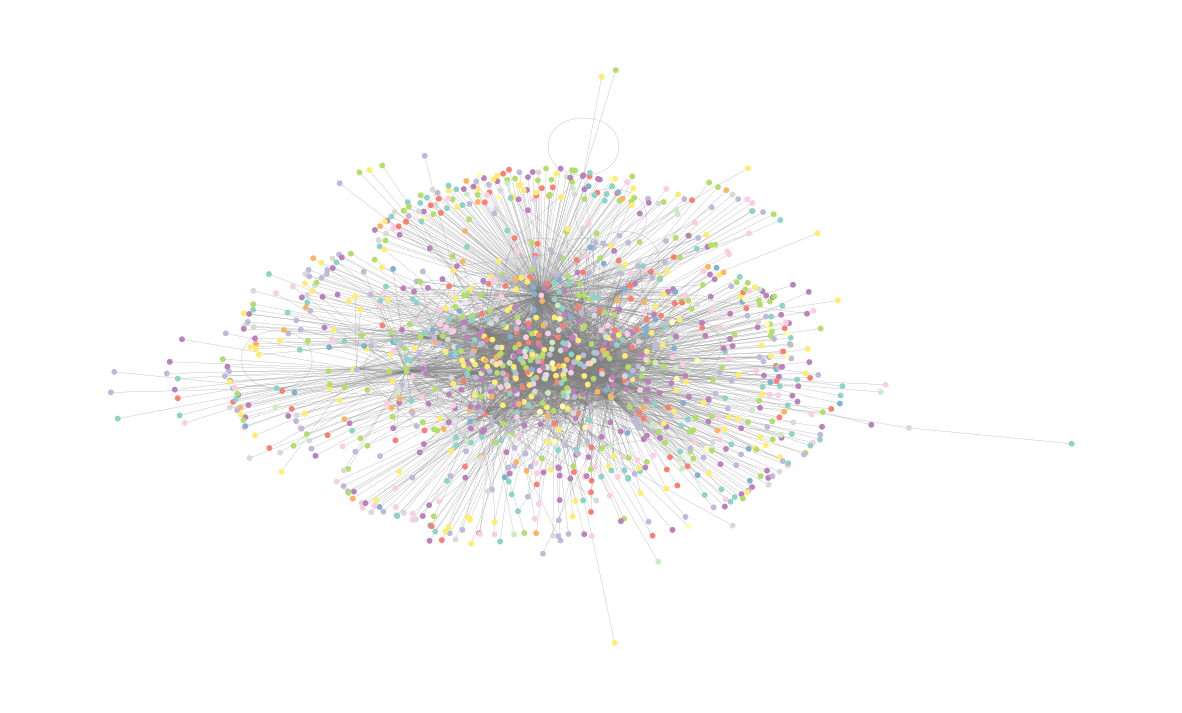

In [156]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df['community'], cmap=plt.cm.Set3, edge_color='gray', node_size= 10, with_labels= False, width= 0.15)

In [157]:
nx.community.modularity(G, c)

0.34530630594438033

In [158]:
df_cd.head(2)

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,post_author,post_author_id,post_name
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
1,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck


In [159]:
df.head()

,node,community
0,-H-O-D-L-,13
1,-MarchToTheSea-,3
2,-TheNigerianPrince-,14
3,-Tizona-,3
4,-Z3TA-,6


In [163]:
df_cd

,name,author,author_fullname,ups,downs,parent_id,link_id,id,body,type_coms,post_author,post_author_id,post_name
0,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
1,t1_kjsotwv,HommoFroggy,t2_1zz2ds3e,89,0,t3_1ac9dck,t3_1ac9dck,kjsotwv,It is probably the hardest period for Abate an...,comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
2,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
3,t1_kjsp97c,TeoN72,t2_iru7bb,63,0,t3_1ac9dck,t3_1ac9dck,kjsp97c,"Not following the primavera a lot, is the fact...",comment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
4,t1_kjsuich,massimopericcolo,t2_5l5oqqyv,62,0,t1_kjsp97c,t3_1ac9dck,kjsuich,"For sure, Simic Zeroli Jimenez are top level f...",subcomment,HommoFroggy,t2_1zz2ds3e,t3_1ac9dck
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,t1_kfs481x,Claija79,t2_122yao,14,0,t3_18vlkk4,t3_18vlkk4,kfs481x,happy new year hermanos ❤️🖤,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12011,t1_kfs1mba,BowieIsMyGod,t2_ebipgu8s,6,0,t3_18vlkk4,t3_18vlkk4,kfs1mba,Happy New Year 🎇\n\nMay we win a trophy in 202...,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12012,t1_kfs0fl3,BredIN919,t2_942i9gwv,8,0,t3_18vlkk4,t3_18vlkk4,kfs0fl3,Hopefully pioli won’t be our coach end of 2024,comment,mercurialsaliva,t2_38mt9,t3_18vlkk4
12013,t1_kfs1cuf,BowieIsMyGod,t2_ebipgu8s,5,0,t1_kfs0fl3,t3_18vlkk4,kfs1cuf,He will be sacked at the end of the season.,subcomment,mercurialsaliva,t2_38mt9,t3_18vlkk4
